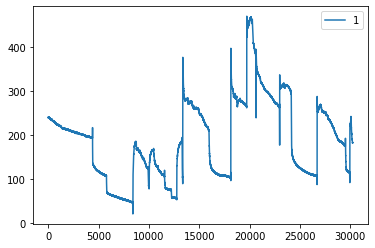

(30254, 2)


In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd

file="dataORP.18787.txt"


noiseP=-30
noiseN=5

smoothP=-30
smoothN=15

baseP=-30
baseN=5

nowP=-10
nowN=5

threshold=5

series=read_csv(file, sep="\t", header=None,parse_dates=True)
series=series.values
series


series2 = pd.DataFrame(series)
series2.plot()
pyplot.show()

print(series.shape)

In [2]:
list(reversed(range(1,6)))

[5, 4, 3, 2, 1]

['06/09/2021 02:00:02' '06/09/2021 02:00:04' '06/09/2021 02:00:09' ...
 '06/10/2021 00:08:00' '06/10/2021 00:08:02' '06/10/2021 00:08:07']
[1623196802.0 1623196804.0 1623196809.0 ... 1623276480.0 1623276482.0
 1623276487.0]


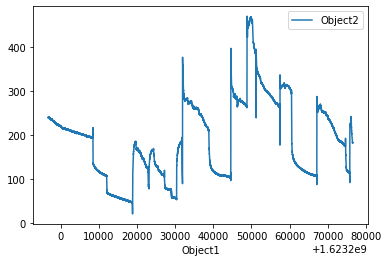

In [3]:
from datetime import datetime

print((series[:,0]))

for i in series:
    i[0]=datetime.strptime(i[0], '%m/%d/%Y %H:%M:%S').timestamp()

print((series[:,0]))

series2 = pd.DataFrame({'Object1':series[:,0],'Object2':series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

In [4]:
def getSubWindow(v,i,incT):
    t0=v[i][0]
    ret=[]
    if(incT>0):
        for j in range(i+1,len(v)):
            if(v[j][0]<= t0+incT):
                if(v[j][1]>=0):
                    ret.append(v[j][1])
            else:
                 return ret
    else:
        for j in reversed(range(0,i)):
            if(v[j][0]>= t0+incT):
                if(v[j][1]>=0):
                    ret.append(v[j][1])
            else:
                 return ret
    return ret       

In [5]:
getSubWindow(series,11,-5)

def avg(lst):
    if(len(lst)==0):
        return -1
    return sum(lst) / len(lst)

print(getSubWindow(series,11,-15))
print(avg(getSubWindow(series,11,-15)))




[240.6, 239.0, 239.4, 240.4, 240.4, 240.6]
240.06666666666663


In [6]:
def getSubWindowFP0(v,i,incTF, incTP):
    return getSubWindow(v,i,incTF)+(getSubWindow(v,i,incTP))
def getSubWindowFP(v,i,incTF, incTP):
    return getSubWindow(v,i,incTF)+(getSubWindow(v,i,incTP))+[v[i][1]]
getSubWindowFP(series,11,-5,10)

[240.6, 239.0, 239.1, 240.0, 239.2, 239.5]

In [7]:
#Quitamos valores puntuales feos 0,-1
for i in range(0,len(series)):
    if(series[i][1]<=0):
        print(getSubWindowFP0(series,i,noiseP,noiseN),avg(getSubWindowFP(series,i,noiseP,noiseN)))
        series[i][1]=avg(getSubWindowFP0(series,i,noiseP,noiseN))
        

In [8]:
print(series)

[[1623196802.0 239.1]
 [1623196804.0 240.8]
 [1623196809.0 239.5]
 ...
 [1623276480.0 183.3]
 [1623276482.0 181.9]
 [1623276487.0 182.0]]


30254


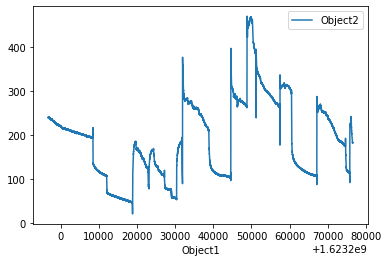

In [9]:
print(len(series))
series2 = pd.DataFrame({'Object1':series[:,0],'Object2':series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

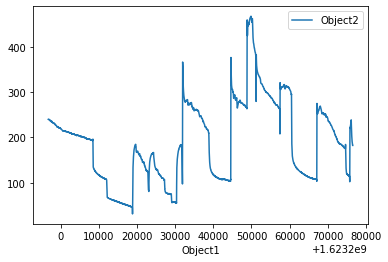

In [10]:
#Quitamos valores puntuales feos 0,-1
avg_series=np.zeros((len(series),2))
for i in range(0,len(series)):
        avg_series[i][1]=avg(getSubWindowFP(series,i,smoothP,smoothN))
        avg_series[i][0]=series[i][0]
series2 = pd.DataFrame({'Object1':avg_series[:,0],'Object2':avg_series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

2021-06-09 05:14:58 6.269047619047598
2021-06-09 05:15:01 7.614285714285728
2021-06-09 05:15:03 13.799999999999983
2021-06-09 05:15:05 18.58571428571426
2021-06-09 05:15:08 20.457142857142827
2021-06-09 05:15:10 21.478571428571428
2021-06-09 05:15:12 23.39619047619047
2021-06-09 05:15:15 22.123076923076923
2021-06-09 05:15:17 23.311904761904742
2021-06-09 05:15:22 20.846666666666692
2021-06-09 05:15:24 16.383333333333326
2021-06-09 05:15:27 10.76190476190476
2021-06-09 05:15:29 8.63095238095238
2021-06-09 05:15:31 8.63095238095238
2021-06-09 05:15:33 6.6738095238095525
2021-06-09 06:15:06 5.129487179487185
2021-06-09 06:15:08 5.121428571428567
2021-06-09 06:15:10 5.378571428571391
2021-06-09 06:15:13 5.421428571428564
2021-06-09 06:15:15 5.963809523809502
2021-06-09 06:15:17 5.686666666666653
2021-06-09 06:15:19 5.370476190476197
2021-06-09 06:15:22 5.150000000000006
2021-06-09 06:15:24 5.05714285714285
2021-06-09 06:15:29 5.509999999999991
2021-06-09 06:15:31 5.676666666666662
2021-06

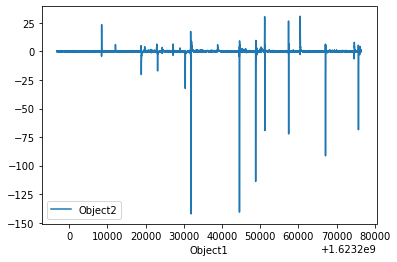

In [11]:



#Computamos bajadas
f = open("orp-down.tsv", "w")

avg_down=np.zeros((len(series),2))
avg_down_threshold=np.zeros((len(series),2))
for i in range(0,len(series)):
        avg_down[i][1]=avg(getSubWindowFP(series,i,baseP,baseN))-avg(getSubWindowFP(series,i,nowP,nowN))
        avg_down[i][0]=series[i][0]
        avg_down_threshold[i][0]=series[i][0]
        f.write(str(datetime.fromtimestamp(avg_down[i][0]))+"\t")
        if(avg_down[i][1]>5):
            print( datetime.fromtimestamp(avg_down[i][0]), avg_down[i][1])
            avg_down_threshold[i][1]=1
            f.write("1\n")
        else:
            avg_down_threshold[i][1]=0
            f.write("0\n")
f.close()            
series2 = pd.DataFrame({'Object1':avg_down[:,0],'Object2':avg_down[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

2021-06-09 08:08:00
2021-06-09 08:08:02
2021-06-09 08:08:05
2021-06-09 08:08:07
2021-06-09 08:08:09
2021-06-09 08:08:12
2021-06-09 08:08:21
2021-06-09 08:08:23
2021-06-09 08:08:26
2021-06-09 08:08:28
2021-06-09 08:08:30
2021-06-09 08:08:33
2021-06-09 08:08:40
2021-06-09 08:08:42
2021-06-09 08:08:45
2021-06-09 08:08:47
2021-06-09 08:08:49
2021-06-09 09:19:13
2021-06-09 09:19:15
2021-06-09 09:19:17
2021-06-09 09:19:20
2021-06-09 09:19:22
2021-06-09 09:19:25
2021-06-09 09:19:28
2021-06-09 09:19:30
2021-06-09 09:19:32
2021-06-09 11:19:53
2021-06-09 11:19:55
2021-06-09 11:19:57
2021-06-09 11:20:00
2021-06-09 11:20:02
2021-06-09 11:20:04
2021-06-09 11:20:07
2021-06-09 11:20:09
2021-06-09 11:20:12
2021-06-09 11:20:14
2021-06-09 11:20:16
2021-06-09 11:20:19
2021-06-09 11:45:39
2021-06-09 11:45:42
2021-06-09 11:45:44
2021-06-09 11:45:46
2021-06-09 11:45:52
2021-06-09 11:45:54
2021-06-09 11:45:57
2021-06-09 11:45:59
2021-06-09 11:46:02
2021-06-09 11:46:04
2021-06-09 11:46:09
2021-06-09 11:46:11


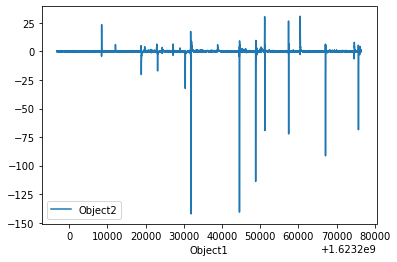

In [12]:
#Computamos subidas
avg_up=np.zeros((len(series),2))
avg_up_threshold=np.zeros((len(series),2))
f = open("orp-up.tsv", "w")
for i in range(0,len(series)):
        avg_up[i][1]=avg(getSubWindowFP(series,i,baseP,baseN))-avg(getSubWindowFP(series,i,nowP,nowN))
        avg_up[i][0]=series[i][0]
        avg_up_threshold[i][0]=series[i][0]
        f.write(str(datetime.fromtimestamp(avg_up[i][0]))+"\t")
        if(avg_up[i][1]<-7):
            print( datetime.fromtimestamp(avg_up[i][0]))
            avg_up_threshold[i][1]=1
            f.write("1\n")
        else:
            avg_up_threshold[i][1]=0
            f.write("0\n")
f.close()               
series2 = pd.DataFrame({'Object1':avg_up[:,0],'Object2':avg_up[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

In [13]:
def fuzzyOneHot(v,t):
    toret=np.zeros((len(v),2))
    for i in range(0,len(v)):
        toret[i][0]=v[i][0]
        if(v[i][1]>0):
            toret[i][1]=1          
            for j in range(i+1,min(len(v),i+t)):
                toret[j][1]=1
            for j in reversed(range(max(0,i-t),i)):
                toret[j][1]=1
    return toret



v=[[0,0],[0,0],[0,0],[0,1],[0,0],[0,0]]
for i in fuzzyOneHot(v,2):
    print(i)

def aggregateMinute(v):

    dictionary = dict()
    for i in v: #
        ym = int(i[0]/60)    # the key is only the year month combination (i.e. '1998-01' for example)
        dictionary[ym] = max(dictionary.get(ym, 0) , i[1])  # return the value for that key or return default 0 (and create key)

    data_aggregated = [(key, val) for (key, val) in dictionary.items()] # if you need it back in old format
    toret=np.zeros((len(data_aggregated),2))
    i=0
    for (key, val) in data_aggregated:
        toret[i][0]=key
        toret[i][1]=val
        i=i+1
    return toret    


data_aggregated=aggregateMinute(avg_down_threshold)
data_aggregated=fuzzyOneHot(data_aggregated,3)
f = open("orp-donw-minute.tsv", "w")
for i in range(0,len(data_aggregated)):
    key=data_aggregated[i][0]
    val=data_aggregated[i][1]
    if val>0:
        f.write(str(datetime.fromtimestamp(key*60))+"\t1\n")
    else:
        f.write(str(datetime.fromtimestamp(key*60))+"\t0\n")
f.close()

[0. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 0.]


In [14]:
data_aggregated=aggregateMinute(avg_up_threshold)
data_aggregated=fuzzyOneHot(data_aggregated,3)
f = open("orp-up-minute.tsv", "w")
for i in range(0,len(data_aggregated)):
    key=data_aggregated[i][0]
    val=data_aggregated[i][1]
    if val>0:
        f.write(str(datetime.fromtimestamp(key*60))+"\t1\n")
    else:
        f.write(str(datetime.fromtimestamp(key*60))+"\t0\n")
f.close()